In [4]:
from NeuralNetwork import Perceptron, Layer, ANN
from cross_validation import k_fold_cross_validation as k_fold_score
import matplotlib.pyplot as plt
import numpy as np


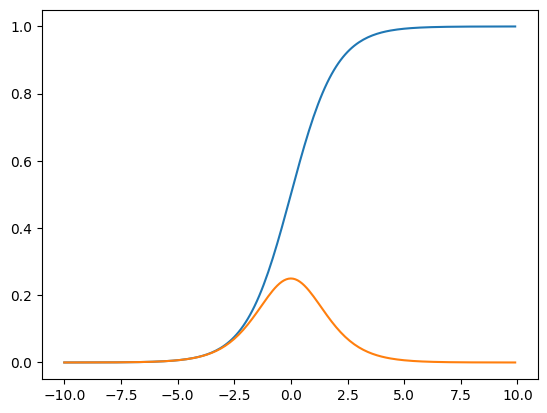

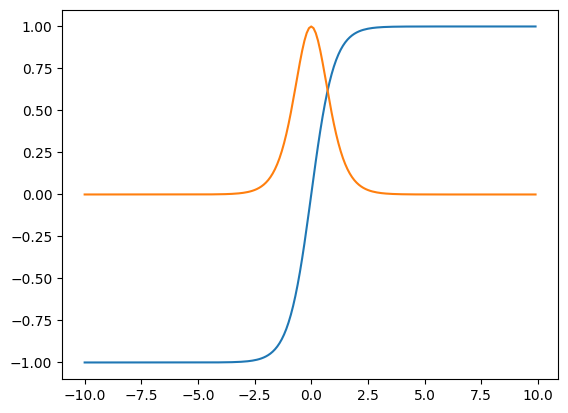

In [5]:
# sigmoid function
percept = Perceptron(3, None, 5, "sigmoid")
 
x=np.arange(-10,10,0.1) 
y=np.arange(-10,10,0.1)
y_deriv=np.arange(-10,10,0.1)
for i in range(len(x)):
    y[i] = percept.activate(x[i], input=[1,0,1])
    y_deriv[i] = percept.activation_deriv(x[i])
plt.plot(x,y)
plt.plot(x,y_deriv)
plt.show()

# tanh function
percept = Perceptron(3, None, 5,"tanh")
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)

y_deriv=np.arange(-10,10,0.1)
for i in range(len(x)):
    y[i]=percept.activate(x[i], input=[1,0,1])

    y_deriv[i]=percept.activation_deriv(x[i])
plt.plot(x,y)
plt.plot(x,y_deriv)
plt.show()

In [6]:
# feed forward for perceptrons
percept=Perceptron(3, None, 5,"sigmoid")
input=[1,0,1]
x = percept.feed_forward(input)  
y = percept.activate(percept.z_value, [])
assert x == y

In [7]:
# feed forward for layers
layer=Layer(2,2)
percept=Perceptron(2, None, 2,"sigmoid")
print(layer.feed_forward([0,1]))
x = layer.perceptrons[0].z_value 
y = layer.perceptrons[1].z_value
expected=[percept.activate(x, [0, 1]),percept.activate(y, [1, 0])]
print(expected)

[0.05794183 0.26273782]
[0.057941831633789125, 0.26273781769075294]


In [8]:
from NeuralNetwork import Perceptron, Layer, ANN
import matplotlib.pyplot as plt
import numpy as np
# the xor gate
inputs=[
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]
targets=[[0],[1],[1],[0]]
def loss(prediction,target):
    # epsilon = 1e-8
    # if(prediction[0] == 0):
    #     return -target[0]/epsilon + (1 - target[0])
    # elif(prediction[0] == 1):
    #     return -target[0] + (1 - target[0])/epsilon
    return -target[0]/prediction[0]+(1-target[0])/(1-prediction[0])

layers=[]
layers.append(Layer(3,2,"sigmoid"))
layers.append(Layer(2,3,"softmax"))

model=ANN(layers)
model.train(inputs,targets,0.5,0.001, loss, loss, 1)

TypeError: ANN.train() missing 1 required positional argument: 'loss_function_deriv'

In [9]:
#try your input and see the output!
print(model.predict([0,1]))
print(model.predict([0,0]))
print(model.predict([1,0]))
print(model.predict([1,1]))

[0.00488373 0.99511627]
[0.01164875 0.98835125]
[0.02439318 0.97560682]
[0.00895777 0.99104223]


In [10]:
from NeuralNetwork import Perceptron, Layer, ANN
import matplotlib.pyplot as plt
import numpy as np
# the and gate
inputs2=np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])
targets2=np.array([[0,1],[1,0],[1,0],[0,1]])
def loss_deriv(x,prediction,target):
    epsilon = 1e-8 
    if(prediction[x] == 0):
        return -target[x]/epsilon + (1 - target[x])
    elif(prediction[x] == 1):
        return -target[x] + (1 - target[x])/epsilon
    return -target[x]/prediction[x]+(1-target[x])/(1-prediction[x])

def loss(prediction,target):
    return -target[0]*np.log(prediction[0])-target[1]*np.log(prediction[1])

layers2=[]
layers2.append(Layer(2,2,"sigmoid"))
layers2.append(Layer(2,2,"softmax"))

model2=ANN(layers2)

loss=model2.train(inputs2,targets2,0.2,0.001,loss,loss_deriv,1)
plt.plot(range(len(loss)),loss)
plt.show()

TypeError: ANN.train() missing 1 required positional argument: 'loss_function_deriv'

In [11]:
plt.plot(range(len(loss))[500:1500],loss[500:1500])
plt.show()

TypeError: object of type 'function' has no len()

In [12]:
#try your input and see the output!
print(model2.predict([1,1]))

[0.28509762 0.71490238]


In [1]:
from NeuralNetwork import Perceptron, Layer, ANN
from cross_validation import k_fold_cross_validation as k_fold_score
import matplotlib.pyplot as plt
import math as math
import numpy as np

features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
oh_targets=np.ndarray((len(targets),7))
for x in range(len(targets)):
    if targets[x]==1:
        oh_targets[x][0]=1
    if targets[x]==2:
        oh_targets[x][1]=1
    if targets[x]==3:
        oh_targets[x][2]=1
    if targets[x]==4:
        oh_targets[x][3]=1
    if targets[x]==5:
        oh_targets[x][4]=1
    if targets[x]==6:
        oh_targets[x][5]=1
    if targets[x]==7:
        oh_targets[x][6]=1

num_sample = np.shape(features)[0]
num_sample_train = int(num_sample * 0.75)
num_sample_validation = int(num_sample * 0.15)
num_sample_test = num_sample - num_sample_train - num_sample_validation

# Test set that gets reserved for testing after hyper-parameter tuning
X_test_set = features[0:num_sample_test]
y_test_set = oh_targets[0:num_sample_test]

# Validation and Train set
features = features[num_sample_test:]
oh_targets = oh_targets[num_sample_test:]

layers=[]
layers.append(Layer(12,10))
layers.append(Layer(9,12))
layers.append(Layer(7,9,"softmax"))

def loss_deriv(x,prediction,target):
    return -target[x]/prediction[x]+(1-target[x])/(1-prediction[x])
def loss(prediction,target):
    sum=0
    for x in range(len(target)):
        sum+=-target[x]*np.log(prediction[x])-(1-target[x])*np.log(1-prediction[x])
    return sum

model=ANN(layers)



In [2]:
loss_value=model.train(features,oh_targets, X_test_set, y_test_set,0.25,0.05,loss,loss_deriv,10)
plt.plot(range(len(loss_value)),loss_value)
plt.show()

loss_value=0
for x in range(len(features)):
    a=loss(model.predict(features[x]),oh_targets[x])
    if not math.isnan(a):
        loss_value+=a
loss_value/=len(features)
print(loss_value)

KeyboardInterrupt: 

In [3]:
# loss=model.train(features,oh_targets,0.25,0.01,loss,loss_deriv,1)


# plt.plot(range(len(loss)),loss)
# plt.show()
score = k_fold_score(features, oh_targets, model, loss, loss_deriv, 5, [0.26, 0.05, 1])
 
print(score)

0.8959660297239914


[0.8959660297239915, 0.8901627742392073, 0.9106864826610049, 0.8989384288747345, 0.9099787685774947, 0.9191790516631281, 0.9121019108280255, 0.9152158527954708, 0.9249823071479122, 0.9205944798301486]


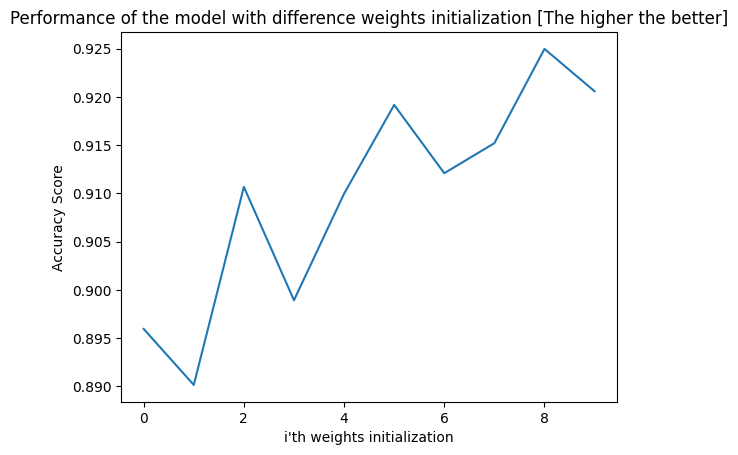

In [4]:
# Training 10 times for the randomized weight

scores = []
for i in range(10):
    scores.append(k_fold_score(features, oh_targets, model, loss, loss_deriv, 5, [0.26, 0.05, 1]))
print(scores)
plt.plot(scores)
plt.title("Performance of the model with difference weights initialization [The higher the better]")
plt.ylabel("Accuracy Score")
plt.xlabel("i'th weights initialization")
plt.show()

7
10
13
16
19
22
25
28


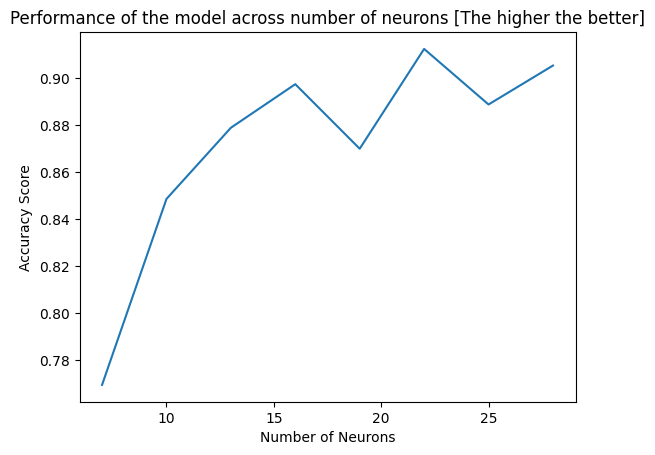

In [5]:
scores = []
hidden_neurons_number = []
layers=[]
# layers.append(Layer(12,10))
# layers.append(Layer(9,12))
# layers.append(Layer(7,9,"softmax"))

# start = 7
for start in range(7, 30, 3):
    firstLayerNeuron = int(start/2)
    layers = []
    layers.append(Layer(firstLayerNeuron, 10))
    layers.append(Layer(start - firstLayerNeuron, firstLayerNeuron))
    layers.append(Layer(7, start - firstLayerNeuron, "softmax"))

    print(start)
    modelTemp = ANN(layers)

    score = k_fold_score(features, oh_targets, modelTemp, loss, loss_deriv, 5, [0.26, 0.05, 1])

    scores.append(score)
    hidden_neurons_number.append(start)

plt.plot(hidden_neurons_number, scores)
plt.title("Performance of the model across number of neurons [The higher the better]")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neurons")
plt.show()

In [3]:
# Model with the best result: 
# 22 neurons 
# 0.25, 0.05, 10
layers = []
layers.append(Layer(11, 10))
layers.append(Layer(11, 11))
layers.append(Layer(7, 11))

model = ANN(layers)
loss_values = model.train(features, oh_targets, X_test_set, y_test_set, 0.26, 0.05, loss, loss_deriv, 10)
print(loss_values)

[[3.9619633754156154, 3.711740866343164, 3.273164728202606, 3.0711804864676346, 2.9258085556874285, 2.8771234750856833, 2.9070746066715603, 2.7671224092381537, 2.7455507135115753, 2.708930325561127, 2.900074721305214, 2.8564942618766542, 2.7366876858520053, 2.919905368374874, 2.783073493931474, 2.7782262007964653, 2.7031532926720354, 2.8096919076976086, 2.820607540767965, 2.7905860075789937, 2.7947409233776854, 2.6959450765827078, 2.740147823721093, 2.8970461524353346, 2.773957627975198, 2.7588565487159284, 2.7650251284327547, 2.819395798107912, 2.911230456076562, 2.8338529111108626, 2.7724645750861105, 2.879295573085114, 2.8342017620797795, 2.779452433590407, 2.726086621332801, 2.8880507121567676, 2.780121898048246, 2.7399868496355837, 2.6824256421193438, 2.8364842557065963, 2.5856767125832305, 2.664317383395654, 2.914866618677683, 2.7329811216212043, 2.779213351198094, 2.8590247867778427, 2.884002318211796, 2.7849408838837197, 2.862216276302554, 2.7675998031144733, 2.6528956757320232

(2, 9885)


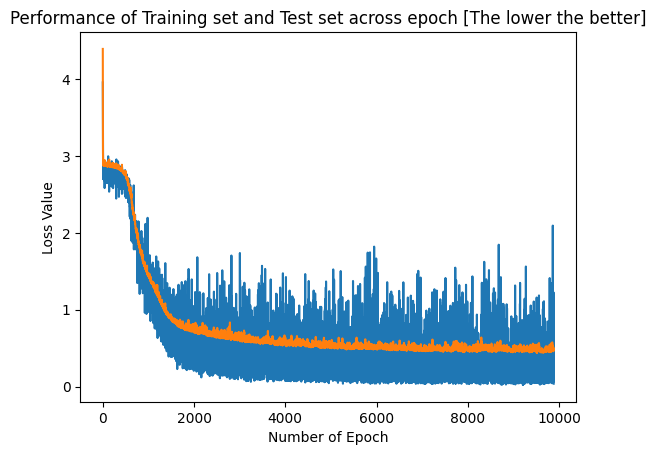

In [13]:
print(np.shape(loss_values))
plt.plot(loss_values[0])
plt.plot(loss_values[1])
plt.title("Performance of Training set and Test set across epoch [The lower the better]")
plt.ylabel("Loss Value")
plt.xlabel("Number of Epoch")
plt.show()

In [ ]:
scores = []


In [ ]:
loss_value=0
def loss(prediction,target):
    sum=0
    for x in range(len(target)):
        if prediction[x]!=0 and prediction[x]!=1:
            sum+=-target[x]*np.log(prediction[x])-(1-target[x])*np.log(1-prediction[x])
        elif prediction[x]!=0:
            sum+=-(1-target[x])*np.log(1-prediction[x])
        else:
            sum+=-target[x]*np.log(prediction[x])
    return sum
for x in range(len(features)):
    loss_value+=loss(features[x],oh_targets[x])
loss_value/=len(features)
print(loss_value)

In [3]:
model.train(features, oh_targets, X_test_set[:1], y_test_set[:1], 0.26, 0.05, loss, loss_deriv, 10)

[[2.871219448428969,
  2.501310975600716,
  2.6059408804702198,
  2.7505808303425505,
  2.6535916481735407,
  2.9360166660969016,
  2.787807686167934,
  2.8681129998856107,
  2.8329580668322434,
  2.888414600584187,
  2.7776281651596717,
  2.7442970679193466,
  2.7551735389101877,
  2.8038764777209186,
  2.8338784625706657,
  2.8395732837486887,
  2.5608108661081737,
  2.716098137027449,
  2.7486147890316377,
  2.7660886015955812,
  2.8275745651164406,
  2.842900037157676,
  2.632362202305081,
  2.8063421011525653,
  2.713592636013778,
  2.7999822907507896,
  2.821440096208022,
  2.777526403705314,
  2.8061917539812393,
  2.687162641361054,
  2.8259623266041483,
  2.7620937386642654,
  2.7375787398663327,
  2.8349157700776733,
  2.7500680337490087,
  2.76911688213045,
  2.8618842061221623,
  2.658785814346763,
  2.678930818518327,
  2.8302272367261727,
  2.6920138370933433,
  2.8209373544131515,
  2.761241579600002,
  2.8281399734144306,
  2.6549214217987753,
  2.7931024906150466,
  2.

In [15]:
# unknown sample
features_unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")
results = model.predictBatch(features_unknown)
resultResult = []
for i in range(len(results)):
    j=np.argmax(results[i])
    results[i,:] = 0
    results[i,j] = 1
for i in range(len(results)):
    count = 0
    j, = np.where(results[i] == 1)
    j = int(j)
    resultResult.append(j+1)
print(resultResult)

[2, 6, 7, 3, 6, 5, 1, 3, 7, 7, 3, 3, 1, 3, 6, 4, 2, 4, 2, 2, 7, 5, 6, 6, 5, 1, 1, 3, 1, 6, 6, 4, 4, 4, 4, 4, 5, 2, 2, 7, 4, 6, 5, 5, 5, 7, 5, 4, 5, 1, 5, 5, 2, 1, 6, 3, 1, 4, 1, 1, 3, 6, 3, 2, 7, 2, 2, 2, 7, 7, 7, 6, 7, 1, 4, 1, 4, 4, 1, 7, 1, 7, 1, 4, 4, 2, 3, 2, 1, 7, 6, 2, 7, 1, 2, 7, 2, 2, 5, 2, 5, 7, 5, 5, 2, 6, 5, 6, 2, 3, 7, 4, 1, 5, 5, 7, 5, 2, 4, 4, 7, 1, 2, 1, 1, 4, 7, 4, 7, 7, 7, 6, 6, 7, 7, 4, 4, 4, 3, 5, 3, 4, 1, 3, 2, 6, 6, 5, 4, 4, 7, 4, 1, 7, 1, 3, 7, 4, 3, 6, 7, 7, 3, 4, 1, 5, 6, 2, 5, 5, 3, 1, 6, 4, 7, 3, 3, 5, 5, 1, 3, 4, 1, 1, 2, 3, 3, 2, 5, 3, 4, 6, 1, 6, 6, 2, 2, 3, 6, 7, 7, 2, 5, 3, 5, 6, 7, 4, 2, 2, 3, 6, 2, 6, 6, 4, 2, 6, 1, 3, 1, 3, 6, 2, 2, 6, 7, 1, 6, 1, 1, 5, 2, 4, 5, 4, 4, 4, 7, 7, 4, 1, 5, 5, 3, 1, 1, 6, 6, 5, 4, 4, 6, 2, 6, 1, 6, 1, 5, 3, 5, 3, 3, 6, 1, 2, 6, 6, 6, 2, 4, 5, 3, 5, 3, 3, 4, 7, 6, 4, 3, 6, 7, 2, 2, 7, 7, 2, 1, 4, 6, 3, 4, 5, 4, 6, 4, 7, 4, 4, 2, 1, 2, 5, 2, 2, 1, 3, 3, 1, 1, 7, 2, 4, 6, 7, 2, 2, 6, 5, 5, 6, 3, 4, 4, 7, 5, 6, 7, 3, 4, 6, 4, 

In [17]:
np.savetxt('Group_06_classes.txt', resultResult, delimiter=',')
print(len(resultResult))

784
